In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rasterstats
from rasterio.plot import show
from rasterio.plot import show_hist

import os
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import pyproj

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.4f}'.format 
plt.style.use('ggplot') 

# Data preparation

## Import spatial data from LSOA level

In [2]:
districts = gpd.read_file('https://github.com/Jackeytanlor/QM_assessment3/blob/main/LSOA.gpkg?raw=true', driver="GPKG")

/opt/conda/envs/sds2021/lib/python3.9/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
districts.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,area,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9000,876,1.7000,0.1333,"MULTIPOLYGON (((532105.092 182011.230, 532162...."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9000,830,1.7000,0.2262,"MULTIPOLYGON (((532746.813 181786.891, 532671...."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7000,817,1.5000,0.0573,"MULTIPOLYGON (((532135.145 182198.119, 532158...."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0000,467,2.1000,0.1907,"MULTIPOLYGON (((533807.946 180767.770, 533649...."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2000,543,3.1000,0.1442,"MULTIPOLYGON (((545122.049 184314.931, 545271...."


<AxesSubplot:>

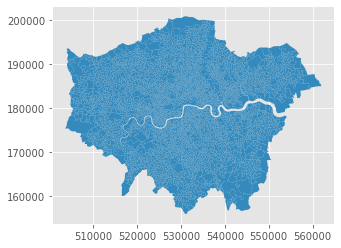

In [4]:
districts.plot()

## Zonal statistics from the raster dataset

### Import air quality data and do the zonal statistics proccess
***As tiff data is difficult to access via github, only the code is shown, the full data can be found in the onedrive link***
https://liveuclac-my.sharepoint.com/:f:/r/personal/ucfnanx_ucl_ac_uk/Documents/Air_quality_tif?csf=1&web=1&e=MRwri5

#### NO2

In [5]:
# NO2 = rasterio.open("data_gis/NO2.tif")
# NO2_data=NO2.read(1)
# affineNO2 = NO2.transform
# avg_NO2 = rasterstats.zonal_stats(districts,NO2_data,affine=affineNO2,stats=['mean'],dataframe=True)
# pd_NO2=pd.DataFrame(avg_NO2,columns=["mean"])
# NO2_re=pd_NO2.rename(columns={"mean":"NO2"})
# districts=districts.join(NO2_re)


#### NOx

In [6]:
# NOx = rasterio.open("data_gis/NOx.tif")
# NOx_data=NOx.read(1)
# affineNOx = NOx.transform
# avg_NOx = rasterstats.zonal_stats(districts,NOx_data,affine=affineNOx,stats=['mean'],dataframe=True)
# pd_NOx=pd.DataFrame(avg_NOx,columns=["mean"])
# NOx_re=pd_NOx.rename(columns={"mean":"NOx"})
# districts=districts.join(NOx_re)

#### PM25

In [7]:
# PM25 = rasterio.open("data_gis/PM25.tif")
# PM25_data=PM25.read(1)
# affinePM25 = PM25.transform
# avg_PM25 = rasterstats.zonal_stats(districts,PM25_data,affine=affinePM25,stats=['mean'],dataframe=True)
# pd_PM25=pd.DataFrame(avg_PM25,columns=["mean"])
# PM25_re=pd_PM25.rename(columns={"mean":"PM25"})
# districts=districts.join(PM25_re)

#### PM10

In [8]:
# PM10 = rasterio.open("data_gis/PM10.tif")
# PM10_data=PM10.read(1)
# affinePM10 = PM10.transform
# avg_PM10 = rasterstats.zonal_stats(districts,PM10_data,affine=affinePM10,stats=['mean'],dataframe=True)
# pd_PM10=pd.DataFrame(avg_PM10,columns=["mean"])
# PM10_re=pd_PM10.rename(columns={"mean":"PM10"})
# districts=districts.join(PM10_re)

## Merge and clean the dataset

In [9]:
# print(list(districts.columns.values))

In [10]:
# col=['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', "area",'NO2', 'NOx', 'PM25', 'PM10']

In [11]:
# LSOA=districts[col]

In [12]:
LSOA=pd.read_csv("https://github.com/Jackeytanlor/QM_assessment3/raw/main/LSOA.csv")

## Calculate the necessary indicators from air quality

### Calculate the synthetic air quality index

In [13]:
NO2_min=min(LSOA["NO2"])
NOx_min=min(LSOA["NOx"])
PM10_min=min(LSOA["PM10"])
PM25_min=min(LSOA["PM25"])

In [14]:
LSOA["AQ"]=(NO2_min/LSOA["NO2"]+NOx_min/LSOA["NOx"]+PM25_min/LSOA["PM25"]+PM10_min/LSOA["PM10"])*100

## Import IMD and Population dataset and merge the dataset

In [15]:
imd=pd.read_csv("https://github.com/Jackeytanlor/QM_assessment3/raw/main/IMD.csv")
population=pd.read_csv("https://github.com/Jackeytanlor/QM_assessment3/blob/main/population.csv?raw=true")

In [16]:
imd_index=imd.set_index("LSOA code")
population_index=population.set_index("LSOA Code")

In [17]:
LSOA=LSOA.join(imd_index,on='LSOA11CD')
LSOA=LSOA.join(population_index,on="LSOA11CD")

In [18]:
LSOA

,Unnamed: 0,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,area,NO2,NOx,...,Housing,Housing_R,Living,Living_R,population,old,median_age,male,male_pop,old_pop
0,0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,0.1333,42.8867,80.4997,...,29.4720,3,31.8730,3,"1,636.0000",547.0000,49.2000,886.0000,0.5400,0.3300
1,1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,0.2262,38.8113,67.6093,...,24.4120,4,23.0840,4,"1,558.0000",482.0000,47.3000,815.0000,0.5200,0.3100
2,2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,0.0573,38.8682,67.8867,...,40.1030,1,40.5350,2,"1,786.0000",518.0000,47.1000,931.0000,0.5200,0.2900
3,3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,0.1907,39.9824,73.9456,...,39.9000,1,28.9790,3,"1,888.0000",265.0000,25.7000,"1,022.0000",0.5400,0.1400
4,4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,0.1442,26.6189,40.2646,...,45.1710,1,26.8880,4,"2,094.0000",247.0000,33.4000,"1,072.0000",0.5100,0.1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,0.1233,25.5032,36.8238,...,40.5460,1,12.5140,7,"1,738.0000",185.0000,35.0000,943.0000,0.5400,0.1100
4831,4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,1.0049,24.6078,35.2174,...,50.2930,1,11.9220,7,"2,338.0000",171.0000,33.1000,"1,169.0000",0.5000,0.0700
4832,4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,0.1523,26.8511,41.0677,...,37.3150,1,14.1740,7,"1,815.0000",119.0000,33.8000,967.0000,0.5300,0.0700
4833,4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,0.5585,26.4817,41.0178,...,45.0600,1,14.8360,6,"2,047.0000",172.0000,33.4000,"1,046.0000",0.5100,0.0800


### The calculate of population density

In [19]:
LSOA["pop_density"]=LSOA["population"]/LSOA["area"]

In [20]:
print(list(LSOA.columns.values))

['Unnamed: 0', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'area', 'NO2', 'NOx', 'PM25', 'PM10', 'AQ', 'LSOA name', 'IMD', 'IMD_R', 'Income', 'Income_R', 'Employment', 'Employment_R', 'Education', 'Education_R', 'Health', 'Health_R', 'Crime', 'Crime_R', 'Housing', 'Housing_R', 'Living', 'Living_R', 'population', 'old', 'median_age', 'male', 'male_pop', 'old_pop', 'pop_density']


# Statistical analysis

## Correlation analysis

### Use pairplot to investigate the potential of each variables

sns.pairplot(df, 
             vars=corr_col, 
             markers=".", height=3, diag_kind='kde',palette="rainbow")

### Build the correlation dataset

In [21]:
corr_col=['AQ',  'Income',  'Employment', 'Education', 'Housing', 'median_age',  'male_pop',"pop_density"]

In [22]:
LSOA_corr=LSOA[corr_col]

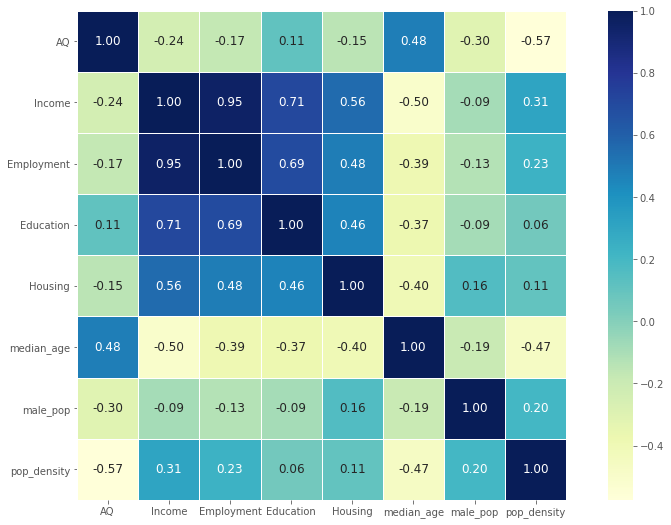

In [23]:
# make the correlation matrix
df = LSOA_corr

RELAT=df.corr()
plt.figure(figsize=(15, 9))
hm = sns.heatmap(RELAT,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':12},
                 yticklabels=corr_col,
                 xticklabels=corr_col,
                cmap="YlGnBu",
                 linewidths=.5)

plt.savefig(os.path.join('output2',"Correlation matrix"))
plt.show()



## Regression analysis

In [24]:
### VIF model

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        vif_df = vif_df.drop('const')
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df
model_new = drop_column_using_vif_(LSOA[["Income","median_age","male_pop","Housing","Education","pop_density","Employment"]])

Dropping: Income


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
### Run the first regression model and therefore find the problem about t-test and p-value

In [27]:
model1 = sm.formula.ols("AQ ~Income+Housing+Education+median_age+male_pop+pop_density", LSOA).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AQ   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     852.2
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:26:23   Log-Likelihood:                -22066.
No. Observations:                4835   AIC:                         4.415e+04
Df Residuals:                    4828   BIC:                         4.419e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     318.7511      8.340     38.219      0.000     302.401     335.101
Income       -149.4483      7.568    -19.749      0.000    -164.284    -134.613
Housing         0.0443      0.044      1.010      0.312      -0.042       0.130
Education       1.5529      0.050     31.355      0.000       1.456       1.650
median_age      2.1545      0.093     23.215      0.000       1.973       2.336
male_pop     -218.8205     13.729    -15.939      0.000    -245.735    -191.906
pop_density    -0.0015   5.75e-05    -26.332      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      257.491   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.856
Skew:                          -0.363   Prob(JB):                    9.75e-118
Kurtosis:                       4.465   Cond. No.                     5.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Run the second regression model and residual plot and find outlier

In [28]:
model2 = sm.formula.ols("AQ ~Income+median_age+male_pop++Education+pop_density", LSOA).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AQ   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1022.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:26:23   Log-Likelihood:                -22067.
No. Observations:                4835   AIC:                         4.415e+04
Df Residuals:                    4829   BIC:                         4.418e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     318.6687      8.340     38.211      0.000     302.319     335.018
Income       -146.6707      7.050    -20.803      0.000    -160.493    -132.849
median_age      2.1395      0.092     23.354      0.000       1.960       2.319
male_pop     -215.3682     13.297    -16.197      0.000    -241.436    -189.300
Education       1.5564      0.049     31.503      0.000       1.460       1.653
pop_density    -0.0015   5.66e-05    -26.931      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      257.716   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.771
Skew:                          -0.361   Prob(JB):                    5.06e-119
Kurtosis:                       4.478   Cond. No.                     5.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

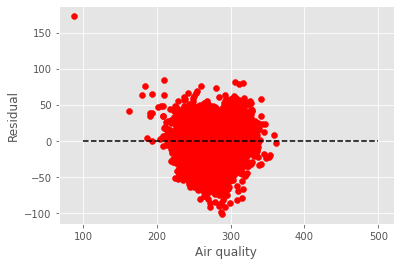

In [29]:
plt.scatter(model2.fittedvalues, model1.resid,color="red")
plt.hlines(0,100,500,color="black",linestyles="--")
plt.xlabel('Air quality')
plt.ylabel('Residual')
# plt.savefig(os.path.join('output2',"Residual plot (origin)"))

## Drop the outlier according to the residual and use the new data to run the model

In [30]:
resid=model1.resid

In [31]:
max(resid)

172.68756316622574

In [32]:
LSOA_drop=df.drop(LSOA[LSOA.LSOA11CD=="E01032773"].index)

### Run the optimized regression model and get the final result

In [33]:
model3 = sm.formula.ols("AQ ~Income+median_age+male_pop++Education+pop_density", LSOA_drop).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AQ   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1047.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:26:23   Log-Likelihood:                -22033.
No. Observations:                4834   AIC:                         4.408e+04
Df Residuals:                    4828   BIC:                         4.412e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     323.1011      8.309     38.884      0.000     306.811     339.391
Income       -143.6460      7.019    -20.465      0.000    -157.406    -129.886
median_age      2.0840      0.091     22.814      0.000       1.905       2.263
male_pop     -218.4988     13.223    -16.524      0.000    -244.422    -192.576
Education       1.5357      0.049     31.225      0.000       1.439       1.632
pop_density    -0.0016   5.76e-05    -28.123      0.000      -0.002      -0.002
==============================================================================
Omnibus:                      231.647   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.674
Skew:                          -0.446   Prob(JB):                     1.57e-72
Kurtosis:                       3.919   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residual')

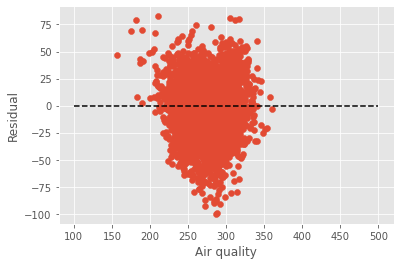

In [34]:
plt.scatter(model3.fittedvalues, model3.resid)
plt.hlines(0,100,500,color="black",linestyles="--")
plt.xlabel('Air quality')
plt.ylabel('Residual')
# plt.savefig(os.path.join('output2',"Residual plot (optimized)"))

## Cluster analysis

### Select variables and use max-min normalization method

In [35]:
LSOA["AQ_NOR"]=(LSOA["AQ"]-min(LSOA["AQ"]))/(max(LSOA["AQ"])-min(LSOA["AQ"]))
LSOA["Income_NOR"]=(LSOA["Income"]-min(LSOA["Income"]))/(max(LSOA["Income"])-min(LSOA["Income"]))
LSOA["Education_NOR"]=(LSOA["Education"]-min(LSOA["Education"]))/(max(LSOA["Education"])-min(LSOA["Education"]))

### Construct cluster dataset 

In [36]:
Cluster=LSOA[["Education_NOR","AQ_NOR","Income_NOR"]]
Cluster["Education"]=Cluster["Education_NOR"]
Cluster["AQ"]=Cluster["AQ_NOR"]
Cluster["Income"]=Cluster["Income_NOR"]
Cluster=Cluster[["Education","AQ","Income"]]

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


### Do hierarchical clustering and make dendrogram

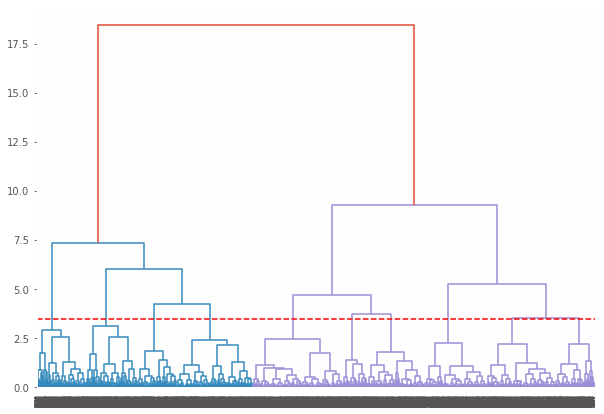

In [37]:
import scipy.cluster.hierarchy as shc


plt.figure(figsize=(10, 7))

# plt.title("Dendrograms")

dend = shc.dendrogram(shc.linkage(Cluster, method='ward'))

plt.axhline(y=3.5, color='r', linestyle='--')
# plt.savefig(os.path.join('output2',"dendrogram"))


### Choose 8 cluster and do the cluster analysis

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')

Cluster["clu"]=cluster.fit_predict(Cluster)

In [39]:
Cluster["Cluster"]=Cluster["clu"]

### Use pairplot to observe the distribution of clusters

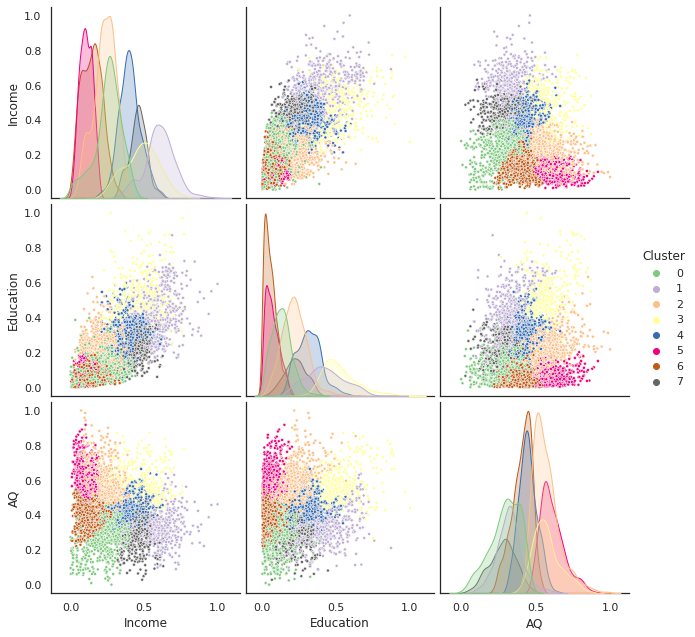

In [40]:
sns.set(style="white")
sns.pairplot(Cluster, 
             vars=["Income","Education","AQ"], 
             hue="Cluster", markers=".", height=3, diag_kind='kde',palette="Accent")
# plt.savefig(os.path.join('output2',"Cluster analysis"))

### Make the cluster analysis map to see the spatial distribution of each cluster

In [41]:
map=Cluster["clu"]
District=districts.join(map)

In [42]:
District= District.to_crs("EPSG:4326")

<AxesSubplot:>

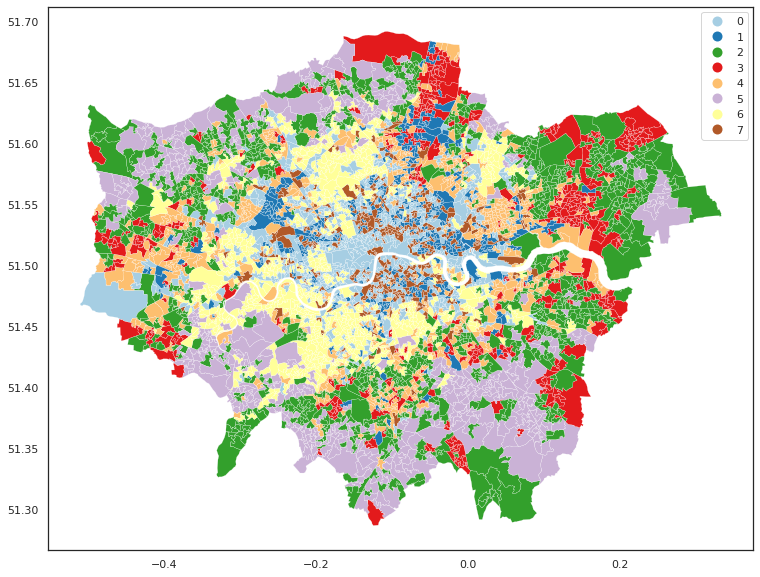

In [43]:
District.plot("clu",linewidth=0.2, zorder=0,figsize=(15, 10), categorical=True,legend=True,cmap='Paired')

# plt.savefig(os.path.join('output2',"Cluster analysis map"))